In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.9 MB/s eta 0:00:00


In [10]:
pip install gTTS

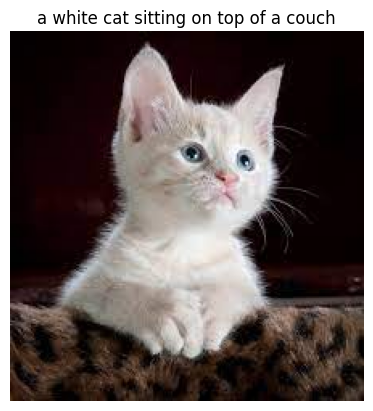

In [11]:
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image
import matplotlib.pyplot as plt
from gtts import gTTS
import IPython.display as ipd

# gpt2 image captioning model
model = VisionEncoderDecoderModel.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
feature_extractor = ViTImageProcessor.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
tokenizer = AutoTokenizer.from_pretrained('nlpconnect/vit-gpt2-image-captioning')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {'max_length': max_length, 'num_beams': num_beams}

def predict_step(image):

    pixel_values = feature_extractor(images=[image], return_tensors='pt').pixel_values
    pixel_values = pixel_values.to(device)

    output_ids = model.generate(pixel_values, **gen_kwargs)

    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds[0]


image_path = '/content/poocha.jpg'
image = Image.open(image_path)


caption = predict_step(image=image)

# caption to speech
tts = gTTS(caption)


audio_path = '/tmp/caption_audio.mp3'
tts.save(audio_path)


plt.imshow(image)
plt.title(caption)
plt.axis('off')
plt.show()


ipd.Audio(audio_path)
